In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from sklearn.preprocessing import scale # Data scaling
from sklearn import decomposition #PCA

import matplotlib.pyplot as plt
import sys
from sklearn import svm
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [15]:
df = pd.read_csv('data_skripsi_new_master.csv')
#df.drop('No', inplace=True, axis=1)
#df.drop('Date', inplace=True, axis=1)

#df.plot()
df

,Date,Open,High,Low,Close,Volume
0,2020-01-02,6695,6780,6680,6690,49445000
1,2020-01-03,6750,6800,6725,6800,47755500
2,2020-01-06,6720,6750,6690,6735,27300000
3,2020-01-07,6735,6770,6730,6740,45022500
4,2020-01-08,6670,6745,6670,6680,53692500
...,...,...,...,...,...,...
826,2023-05-24,9200,9200,9025,9025,77392900
827,2023-05-25,9100,9150,9050,9050,76325700
828,2023-05-26,9175,9200,9100,9150,55675900
829,2023-05-29,9250,9250,9075,9150,79148200


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    831 non-null    object
 1   Open    831 non-null    int64 
 2   High    831 non-null    int64 
 3   Low     831 non-null    int64 
 4   Close   831 non-null    int64 
 5   Volume  831 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 39.1+ KB


In [17]:
df.describe()

,Open,High,Low,Close,Volume
count,831.000000,831.000000,831.000000,831.000000,8.310000e+02
mean,7128.110710,7199.362214,7053.225030,7125.535499,9.280665e+07
std,1074.864538,1074.310769,1082.796417,1082.247542,5.561873e+07
min,4450.000000,4800.000000,4325.000000,4430.000000,0.000000e+00
25%,6325.000000,6390.000000,6240.000000,6317.500000,6.060340e+07
50%,7035.000000,7090.000000,6955.000000,7000.000000,8.086510e+07
75%,7937.500000,8000.000000,7875.000000,7950.000000,1.087264e+08
max,9275.000000,9400.000000,9150.000000,9300.000000,6.443596e+08


In [19]:
data = df[df.Volume != 0]
data.to_csv('data_clean.csv', index=False)
data

,Date,Open,High,Low,Close,Volume
0,2020-01-02,6695,6780,6680,6690,49445000
1,2020-01-03,6750,6800,6725,6800,47755500
2,2020-01-06,6720,6750,6690,6735,27300000
3,2020-01-07,6735,6770,6730,6740,45022500
4,2020-01-08,6670,6745,6670,6680,53692500
...,...,...,...,...,...,...
826,2023-05-24,9200,9200,9025,9025,77392900
827,2023-05-25,9100,9150,9050,9050,76325700
828,2023-05-26,9175,9200,9100,9150,55675900
829,2023-05-29,9250,9250,9075,9150,79148200


In [20]:

datacomplete = pd.read_csv('data_skripsi_new_variabel_tambahan.csv')
datacomplete_clean =datacomplete.dropna()
datacomplete_clean.info()
datacomplete_clean.to_csv('datacomplete_clean2.csv', index=True)
#datacomplete_clean.plot()

datacomplete_clean.drop('Date', inplace=True, axis=1)
datacomplete_clean

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770 entries, 59 to 828
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      770 non-null    object 
 1   Open                                      770 non-null    int64  
 2   High                                      770 non-null    int64  
 3   Low                                       770 non-null    int64  
 4   Close                                     770 non-null    int64  
 5   Volume                                    770 non-null    int64  
 6   MA5                                       770 non-null    float64
 7   MA20                                      770 non-null    float64
 8   MA60                                      770 non-null    float64
 9   AlexanderFilter                           770 non-null    float64
 10  RS                                   

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Open,High,Low,Close,Volume,MA5,MA20,MA60,AlexanderFilter,RS,RSI,Money Flow Index,%B,10 days Volatility,30 days Volatility,Chaikin Oscilator,MACD,Accumulation and Distribution Oscillator,%K,William %R
59,5480,5555,5155,5495,159964500,5043.0,5594.75,6347.833333,-5.012965,0.581292,36.760563,46.741064,0.461990,408.816585,726.099090,-2.305801e+08,-647.019231,-1.673455e+09,57.777778,0.422222
60,5660,5710,5485,5525,182638500,5262.0,5556.50,6328.416667,-6.751055,0.664179,39.910314,51.853513,0.487626,404.372662,712.030138,-1.814570e+08,-635.352564,-1.791156e+09,69.970845,0.300292
61,5560,5750,5425,5480,152831500,5458.0,5516.00,6306.416667,-6.324786,0.814024,44.873950,51.779728,0.485338,426.681673,700.504758,-1.388565e+08,-623.301282,-1.892260e+09,68.545994,0.314540
62,5470,5470,5360,5410,136623500,5484.0,5482.50,6284.333333,-2.697842,0.698830,41.135972,46.687754,0.469806,438.435001,685.996457,-1.407243e+08,-589.455128,-1.904680e+09,65.558912,0.344411
63,5460,5530,5365,5495,110506000,5481.0,5441.25,6263.583333,7.324219,0.782875,43.910806,50.517698,0.523623,424.480859,668.145048,-1.149548e+08,-518.589744,-1.841055e+09,74.522293,0.254777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,9200,9200,9025,9025,77392900,8985.0,8968.75,8764.166667,0.277778,1.250000,55.555556,57.274280,0.605021,131.719399,135.000000,3.705115e+07,-49.519231,-1.019336e+09,65.000000,0.350000
825,9100,9150,9050,9050,76325700,9040.0,8965.00,8770.000000,0.555556,1.125000,52.941176,54.357250,0.662860,139.664777,134.432965,1.795170e+07,-54.967949,-1.095661e+09,70.000000,0.300000
826,9175,9200,9100,9150,55675900,9070.0,8962.50,8777.083333,2.521008,1.375000,57.894737,53.973936,0.870942,153.785565,136.088717,-2.584354e+07,-48.717949,-1.095661e+09,90.000000,0.100000
827,9250,9250,9075,9150,79148200,9100.0,8962.50,8783.750000,2.521008,1.375000,57.894737,53.770988,0.870942,157.718103,133.946507,-4.647941e+07,-39.583333,-1.106968e+09,81.818182,0.181818


In [21]:
datacomplete_clean.describe()

,Open,High,Low,Close,Volume,MA5,MA20,MA60,AlexanderFilter,RS,RSI,Money Flow Index,%B,10 days Volatility,30 days Volatility,Chaikin Oscilator,MACD,Accumulation and Distribution Oscillator,%K,William %R
count,770.000000,770.000000,770.000000,770.000000,7.700000e+02,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,7.700000e+02,770.000000,7.700000e+02,770.000000,770.000000
mean,7188.805195,7258.435065,7115.155844,7188.084416,9.141451e+07,7177.567532,7142.229870,7079.806926,0.992617,1.583980,53.252851,51.243702,0.557804,114.998198,203.647642,2.357622e+06,28.013029,-1.597751e+09,54.018436,0.459816
std,1078.221185,1083.293538,1083.420198,1084.492894,5.402361e+07,1080.981230,1071.140476,1009.131303,5.139442,2.301737,14.884604,15.140683,0.324177,64.442239,98.564512,1.049723e+08,149.295605,5.234047e+08,30.977224,0.309772
min,4720.000000,4800.000000,4680.000000,4680.000000,1.065390e+07,4783.000000,5021.500000,5284.000000,-14.576803,0.201342,16.759777,9.399312,-0.333801,25.401772,39.253096,-4.215235e+08,-647.019231,-3.135642e+09,0.000000,0.000000
25%,6342.500000,6391.250000,6266.250000,6326.250000,6.044375e+07,6331.500000,6285.062500,6256.479167,-1.884211,0.783310,43.924484,40.877951,0.295292,74.216263,132.410313,-6.160745e+07,-61.498397,-1.904041e+09,26.666667,0.196766
50%,7265.000000,7350.000000,7237.500000,7275.000000,8.035530e+07,7233.000000,7208.750000,6881.458333,0.463177,1.093074,52.223320,51.585508,0.573038,102.035530,185.600552,6.277569e+06,23.221154,-1.456648e+09,56.330128,0.436699
75%,8050.000000,8168.750000,7968.750000,8050.000000,1.071862e+08,8013.750000,7947.500000,7838.229166,3.722489,1.714286,63.157895,60.986595,0.813646,137.710050,244.227222,7.175469e+07,132.660256,-1.257975e+09,80.323357,0.733333
max,9275.000000,9400.000000,9150.000000,9300.000000,6.443596e+08,9125.000000,8972.500000,8792.916667,26.297968,27.000000,96.428571,91.975323,1.508908,438.435001,726.099090,2.846697e+08,414.102564,-4.951395e+08,100.000000,1.000000


In [22]:
#Normalizing the data

data_n = datacomplete_clean.copy()
data_n= (datacomplete_clean - datacomplete_clean.min())/(datacomplete_clean.max() - datacomplete_clean.min())
data_n.to_csv('data_Normalize.csv', index=True)
data_n

,Open,High,Low,Close,Volume,MA5,MA20,MA60,AlexanderFilter,RS,RSI,Money Flow Index,%B,10 days Volatility,30 days Volatility,Chaikin Oscilator,MACD,Accumulation and Distribution Oscillator,%K,William %R
59,0.166850,0.164130,0.106264,0.176407,0.235615,0.059880,0.145090,0.303180,0.233979,0.014178,0.251049,0.452211,0.431859,0.928290,1.000000,0.270384,0.000000,0.553753,0.577778,0.422222
60,0.206367,0.197826,0.180089,0.182900,0.271395,0.110318,0.135409,0.297646,0.191457,0.017271,0.290585,0.514123,0.445772,0.917531,0.979517,0.339944,0.010995,0.509178,0.699708,0.300292
61,0.184413,0.206522,0.166667,0.173160,0.224359,0.155458,0.125158,0.291377,0.201885,0.022862,0.352888,0.513229,0.444530,0.971544,0.962736,0.400269,0.022352,0.470889,0.685460,0.314540
62,0.164654,0.145652,0.152125,0.158009,0.198782,0.161446,0.116679,0.285083,0.290618,0.018564,0.305969,0.451565,0.436101,1.000000,0.941613,0.397624,0.054248,0.466185,0.655589,0.344411
63,0.162459,0.158696,0.153244,0.176407,0.157569,0.160755,0.106239,0.279170,0.535808,0.021700,0.340799,0.497946,0.465306,0.966215,0.915623,0.434115,0.121032,0.490280,0.745223,0.254777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,0.983535,0.956522,0.972036,0.940476,0.105315,0.967757,0.999051,0.991807,0.363417,0.039131,0.486963,0.579768,0.509479,0.257407,0.139401,0.649361,0.563083,0.801479,0.650000,0.350000
825,0.961581,0.945652,0.977629,0.945887,0.103631,0.980424,0.998102,0.993469,0.370213,0.034467,0.454148,0.544443,0.540867,0.276644,0.138575,0.622316,0.557948,0.772573,0.700000,0.300000
826,0.978046,0.956522,0.988814,0.967532,0.071046,0.987333,0.997469,0.995488,0.418297,0.043795,0.516325,0.539801,0.653789,0.310832,0.140986,0.560300,0.563838,0.772573,0.900000,0.100000
827,0.994512,0.967391,0.983221,0.967532,0.108085,0.994242,0.997469,0.997388,0.418297,0.043795,0.516325,0.537343,0.653789,0.320353,0.137867,0.531079,0.572447,0.768291,0.818182,0.181818


In [23]:
x = data_n.drop(labels='Close', axis=1).values
y = data_n['Close'].values

print(x.shape, y.shape)
y

(770, 19) (770,)


array([0.17640693, 0.18290043, 0.17316017, 0.15800866, 0.17640693,
       0.22835498, 0.21103896, 0.20670996, 0.19805195, 0.17748918,
       0.18073593, 0.17424242, 0.12121212, 0.16125541, 0.1461039 ,
       0.1038961 , 0.10064935, 0.0952381 , 0.05194805, 0.06060606,
       0.03246753, 0.03679654, 0.10606061, 0.11688312, 0.13095238,
       0.1461039 , 0.12229437, 0.13311688, 0.11688312, 0.09307359,
       0.05194805, 0.02272727, 0.01839827, 0.        , 0.01839827,
       0.06277056, 0.06168831, 0.13311688, 0.11038961, 0.14718615,
       0.23809524, 0.24025974, 0.22619048, 0.26406926, 0.24350649,
       0.24242424, 0.21645022, 0.21428571, 0.17748918, 0.23376623,
       0.22510823, 0.19588745, 0.19372294, 0.18614719, 0.2034632 ,
       0.22186147, 0.22619048, 0.20887446, 0.21536797, 0.21969697,
       0.24242424, 0.25757576, 0.25757576, 0.27164502, 0.28354978,
       0.32900433, 0.30735931, 0.32900433, 0.32359307, 0.32900433,
       0.31818182, 0.32467532, 0.31168831, 0.31601732, 0.32900

In [24]:
class convers_pca():
    def __init__(self, no_of_components):
        self.no_of_components = no_of_components
        self.eigen_values = None
        self.eigen_vectors = None
        

    def transform(self, x):
        return np.dot(x - self.mean, self.projection_matrix.T)

    def inverse_transform(self, x):
        return np.dot(x, self.projection_matrix) + self.mean
    def covariance_matrix(self):
        return self.cov_matrix
    
    def eigen_value(self):
        return self.eigen_values
    
    def eigen_vector(self):
        return self.eigen_vectors
    
    def sorted_component(self):
        return self.sorted_components

    def projection_matrik(self):
        return self.projection_matrix

    def explained_varian_ratio(self):
        return self.explained_variance_ratio
    
    def explained_varian(self):
        return self.explained_variance
   
    def fit(self, x):
        self.no_of_components = x.shape[1] if self.no_of_components is None else self.no_of_components
        self.mean = np.mean(x, axis=0)
        
        cov_matrix = np.cov(x - self.mean, rowvar=False)
        self.cov_matrix = cov_matrix
        
        self.eigen_values, self.eigen_vectors = np.linalg.eig(cov_matrix)
        self.eigen_vectors = self.eigen_vectors.T
        
        self.sorted_components = np.argsort(self.eigen_values)[::-1]
        
        self.projection_matrix = self.eigen_vectors[self.sorted_components[:self.no_of_components]]

        self.explained_variance = self.eigen_values[self.sorted_components]
        self.explained_variance_ratio = self.explained_variance / self.eigen_values.sum()

In [25]:
pca = convers_pca(no_of_components=6)
pca.fit(x)

In [26]:
x_std = pca.transform(x)

hasil =  pd.DataFrame(x_std, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
hasil['y'] = y
hasil = hasil[['y', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']]
hasil.to_csv('data_PCA.csv', index=True)
hasil

,y,PC1,PC2,PC3,PC4,PC5,PC6
0,0.176407,-1.014604,0.051428,0.088884,1.165674,-0.126950,0.325077
1,0.182900,-0.930226,-0.116510,0.139472,1.132026,-0.157186,0.306856
2,0.173160,-0.933013,-0.132750,0.105914,1.117333,-0.217310,0.248848
3,0.158009,-0.980185,-0.089106,0.104901,1.120769,-0.217268,0.210507
4,0.176407,-0.950611,-0.282073,0.069428,1.061644,-0.224226,0.189593
...,...,...,...,...,...,...,...
765,0.940476,1.115010,-0.017104,0.098511,0.083636,0.001872,-0.050346
766,0.945887,1.106068,-0.058402,0.170457,0.111393,-0.006017,-0.037926
767,0.967532,1.152704,-0.334930,0.281053,0.161349,-0.012245,0.014250
768,0.967532,1.152743,-0.237343,0.228493,0.159064,-0.040217,0.004097


In [27]:
#inverse_transform
x_invers = pca.transform(x)

In [28]:
cov=pca.covariance_matrix()
out= pd.DataFrame(cov)
a=np.asmatrix(cov)
out.to_csv('covarianmatrix.csv', index=False)
out


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.056032,0.055611,0.057269,-0.001607,0.058686,0.062889,0.063480,0.002011,0.001701,0.005791,0.009345,0.004113,-0.003774,-0.009096,0.003934,0.006659,0.027796,0.005295,-0.005295
1,0.055611,0.055460,0.056944,-0.001104,0.058370,0.062536,0.063122,0.002269,0.001767,0.006094,0.009532,0.004673,-0.003125,-0.008806,0.003819,0.006590,0.027891,0.006052,-0.006052
2,0.057269,0.056944,0.058746,-0.001882,0.060130,0.064466,0.065063,0.002111,0.001809,0.006153,0.009543,0.004557,-0.004236,-0.009501,0.004074,0.006805,0.028238,0.006092,-0.006092
3,-0.001607,-0.001104,-0.001882,0.007268,-0.001605,-0.001625,-0.001066,-0.000332,-0.000095,-0.000620,-0.000474,-0.000214,0.005399,0.001478,-0.001019,-0.000840,0.000529,-0.001202,0.001202
4,0.058686,0.058370,0.060130,-0.001605,0.061981,0.066586,0.067211,0.001335,0.001664,0.005206,0.008902,0.002757,-0.004310,-0.009761,0.003552,0.007167,0.029103,0.003065,-0.003065
5,0.062889,0.062536,0.064466,-0.001625,0.066586,0.073499,0.075157,-0.003372,0.000052,-0.001495,0.003242,-0.002679,-0.005484,-0.011660,-0.000251,0.003411,0.030028,-0.005540,0.005540
6,0.063480,0.063122,0.065063,-0.001066,0.067211,0.075157,0.082708,-0.004848,-0.000553,-0.004896,-0.000184,-0.005657,-0.002970,-0.010505,-0.002136,-0.002618,0.026254,-0.009212,0.009212
7,0.002011,0.002269,0.002111,-0.000332,0.001335,-0.003372,-0.004848,0.015810,0.004456,0.018798,0.016302,0.016451,0.003912,0.003073,0.010247,0.008199,0.003730,0.027587,-0.027587
8,0.001701,0.001767,0.001809,-0.000095,0.001664,0.000052,-0.000553,0.004456,0.007377,0.009752,0.008102,0.005550,0.001076,0.001879,0.004696,0.004568,0.002013,0.010111,-0.010111
9,0.005791,0.006094,0.006153,-0.000620,0.005206,-0.001495,-0.004896,0.018798,0.009752,0.034906,0.029184,0.026695,0.002642,0.003539,0.016334,0.016940,0.008144,0.044248,-0.044248


In [29]:
#eigen_value
eigen_value=pca.eigen_value()
# a=np.asmatrix(cov)
eigen_value

array([ 3.97020184e-01,  2.84615338e-01,  4.02462952e-02,  3.37052016e-02,
        2.24958677e-02,  1.32206355e-02,  1.26427218e-02,  7.45875180e-03,
        6.10281489e-03,  5.68794911e-03,  4.62827647e-03,  3.61549045e-03,
        2.72686532e-03,  1.68776683e-03,  2.83615269e-04,  1.01391452e-04,
        6.97138466e-05,  8.14044821e-05, -4.01295508e-18])

In [30]:
# eigen_vector
eigen_vector=pca.eigen_vector()
out_eigen_vector= pd.DataFrame(cov)
out_eigen_vector.to_csv('eigen_vector.csv', index=False)
eigen_vector

array([[ 3.73951028e-01,  3.72319862e-01,  3.83294308e-01,
        -1.00130274e-02,  3.92825084e-01,  4.20279058e-01,
         4.26979036e-01,  1.71198531e-02,  1.42006497e-02,
         4.79713487e-02,  6.94593386e-02,  3.69939661e-02,
        -2.37535537e-02, -5.91471424e-02,  3.20030901e-02,
         4.42192736e-02,  1.95945593e-01,  5.84835284e-02,
        -5.84835284e-02],
       [ 1.87029728e-02,  1.40201593e-02,  1.60233084e-02,
         4.84841859e-03,  3.43016277e-02,  1.01357051e-01,
         1.35095421e-01, -1.86780789e-01, -7.35549519e-02,
        -3.01750349e-01, -2.55294048e-01, -3.05942962e-01,
        -3.41835346e-02, -4.41522048e-02, -1.72698414e-01,
        -1.16071243e-01, -5.83620118e-02, -5.61036812e-01,
         5.61036812e-01],
       [-1.56355918e-02, -1.47581554e-02, -1.28038365e-03,
        -4.48767131e-02, -3.22934264e-02,  5.80221895e-02,
         1.85994583e-01, -1.42766094e-01, -1.35047141e-01,
        -3.02013619e-01, -4.17541092e-01,  4.30965030e-02,
    

In [31]:
#sorted_components
sorted_component=pca.sorted_component()
sorted_component

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17,
       16, 18], dtype=int64)

In [32]:
#projection_matrik
projection_matrik=pca.projection_matrik()
projection_matrik

array([[ 0.37395103,  0.37231986,  0.38329431, -0.01001303,  0.39282508,
         0.42027906,  0.42697904,  0.01711985,  0.01420065,  0.04797135,
         0.06945934,  0.03699397, -0.02375355, -0.05914714,  0.03200309,
         0.04421927,  0.19594559,  0.05848353, -0.05848353],
       [ 0.01870297,  0.01402016,  0.01602331,  0.00484842,  0.03430163,
         0.10135705,  0.13509542, -0.18678079, -0.07355495, -0.30175035,
        -0.25529405, -0.30594296, -0.03418353, -0.0441522 , -0.17269841,
        -0.11607124, -0.05836201, -0.56103681,  0.56103681],
       [-0.01563559, -0.01475816, -0.00128038, -0.04487671, -0.03229343,
         0.05802219,  0.18599458, -0.14276609, -0.13504714, -0.30201362,
        -0.41754109,  0.0430965 , -0.15034082, -0.30090506, -0.13716052,
        -0.43157794, -0.35327815,  0.32362367, -0.32362367],
       [-0.02713357, -0.00363306, -0.03858862,  0.18894552, -0.04158651,
        -0.00623614,  0.13688499, -0.00152403, -0.03641381, -0.14687725,
        -0.111

In [33]:
#explained_varian_ratio
explained_varian_ratio=pca.explained_varian_ratio()
explained_varian_ratio

array([ 4.74682922e-01,  3.40290106e-01,  4.81190372e-02,  4.02984136e-02,
        2.68963761e-02,  1.58067779e-02,  1.51158162e-02,  8.91778867e-03,
        7.29661141e-03,  6.80059204e-03,  5.53363252e-03,  4.32273128e-03,
        3.26027857e-03,  2.01791778e-03,  3.39094409e-04,  1.21225047e-04,
        9.73283449e-05,  8.33508565e-05, -4.79794559e-18])

In [34]:
#explained_varian
explained_varian=pca.explained_varian()
explained_varian

array([ 3.97020184e-01,  2.84615338e-01,  4.02462952e-02,  3.37052016e-02,
        2.24958677e-02,  1.32206355e-02,  1.26427218e-02,  7.45875180e-03,
        6.10281489e-03,  5.68794911e-03,  4.62827647e-03,  3.61549045e-03,
        2.72686532e-03,  1.68776683e-03,  2.83615269e-04,  1.01391452e-04,
        8.14044821e-05,  6.97138466e-05, -4.01295508e-18])

In [35]:
pcas = decomposition.PCA(n_components=6)
pcas.fit(x)

PCA(n_components=6)

In [36]:
scores = pcas.transform(x)
scores_df = pd.DataFrame(scores, columns=['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6'])
scores_df

,PC1,PC2,PC3,PC4,PC5,PC6
0,1.014604,0.051428,-0.088884,1.165674,0.126950,-0.325077
1,0.930226,-0.116510,-0.139472,1.132026,0.157186,-0.306856
2,0.933013,-0.132750,-0.105914,1.117333,0.217310,-0.248848
3,0.980185,-0.089106,-0.104901,1.120769,0.217268,-0.210507
4,0.950611,-0.282073,-0.069428,1.061644,0.224226,-0.189593
...,...,...,...,...,...,...
765,-1.115010,-0.017104,-0.098511,0.083636,-0.001872,0.050346
766,-1.106068,-0.058402,-0.170457,0.111393,0.006017,0.037926
767,-1.152704,-0.334930,-0.281053,0.161349,0.012245,-0.014250
768,-1.152743,-0.237343,-0.228493,0.159064,0.040217,-0.004097


In [37]:
explained_variance = pcas.explained_variance_ratio_
explained_variance

array([0.47468292, 0.34029011, 0.04811904, 0.04029841, 0.02689638,
       0.01580678])

In [38]:
explained_variance = np.insert(explained_variance, 0, 0)
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))
pc_df = pd.DataFrame(['','PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])
df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance.to_csv('df_explained_variance.csv', index=False)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.474683,0.475
2,PC2,0.340290,0.815
3,PC3,0.048119,0.863
4,PC4,0.040298,0.903
5,PC5,0.026896,0.930
6,PC6,0.015807,0.946


In [39]:
#SVM
dimensions = 1
data_cn = pd.concat([hasil.shift(i) for i in range(0 + dimensions + 1)], axis = 1)
data_cn

,y,PC1,PC2,PC3,PC4,PC5,PC6,y,PC1,PC2,PC3,PC4,PC5,PC6
0,0.176407,-1.014604,0.051428,0.088884,1.165674,-0.126950,0.325077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.182900,-0.930226,-0.116510,0.139472,1.132026,-0.157186,0.306856,0.176407,-1.014604,0.051428,0.088884,1.165674,-0.126950,0.325077
2,0.173160,-0.933013,-0.132750,0.105914,1.117333,-0.217310,0.248848,0.182900,-0.930226,-0.116510,0.139472,1.132026,-0.157186,0.306856
3,0.158009,-0.980185,-0.089106,0.104901,1.120769,-0.217268,0.210507,0.173160,-0.933013,-0.132750,0.105914,1.117333,-0.217310,0.248848
4,0.176407,-0.950611,-0.282073,0.069428,1.061644,-0.224226,0.189593,0.158009,-0.980185,-0.089106,0.104901,1.120769,-0.217268,0.210507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,0.940476,1.115010,-0.017104,0.098511,0.083636,0.001872,-0.050346,0.962121,1.135852,-0.380570,0.283494,0.142859,0.084125,-0.009731
766,0.945887,1.106068,-0.058402,0.170457,0.111393,-0.006017,-0.037926,0.940476,1.115010,-0.017104,0.098511,0.083636,0.001872,-0.050346
767,0.967532,1.152704,-0.334930,0.281053,0.161349,-0.012245,0.014250,0.945887,1.106068,-0.058402,0.170457,0.111393,-0.006017,-0.037926
768,0.967532,1.152743,-0.237343,0.228493,0.159064,-0.040217,0.004097,0.967532,1.152704,-0.334930,0.281053,0.161349,-0.012245,0.014250


In [40]:
# Splitting the data into train, validation and test

from sklearn.model_selection import train_test_split

X = data_cn.iloc[1:,1:]

y = data_cn.iloc[1:,0]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, shuffle = False)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.2, shuffle = False)

In [41]:
def pso(n_particles, iterations, dimensions, inertia):

    # Range of SVR's hyperparameters (Particles' search space)
    # C, Epsilon and Gamma
    max_c = 1e4
    min_c = 1e-3
    max_e = 1e-1
    min_e = 1e-8
    max_g = 1e3
    min_g = 1e-3
    
    # Initializing particles' positions randomly, inside
    # the search space
    x = np.random.rand(n_particles, 1)*(max_c - min_c) + min_c
    y = np.random.rand(n_particles, 1)*(max_e - min_e) + min_e
    z = np.random.rand(n_particles, 1)*(max_g - min_g) + min_g

    c = np.concatenate((x,y,z), axis=1)

    # Initializing particles' parameters
    v = np.zeros((n_particles, dimensions))
    c1 = 2
    c2 = 2
    p_best = np.zeros((n_particles, dimensions))
    p_best_val = np.zeros(n_particles) + sys.maxsize  
    g_best = np.zeros(dimensions)
    g_best_val = sys.maxsize

    best_iter = np.zeros(iterations)

    # Initializing regression variables
    p_best_RGS = np.empty((n_particles), dtype = object);
    g_best_RGS = sys.maxsize

    

    # Displaying tridimensional search space
    plot(c)

    from sklearn.metrics import mean_squared_error
    
    for i in range(iterations):

        for j in range(n_particles):
            #print('iterasi ke # %i = %f \n'%(i, j))
            # Starting Regression
            rgs = svm.SVR(C = c[j][0], epsilon = c[j][1], gamma = c[j][2])
            #print('1')
            # Fitting the curve
            rgs.fit(X_train, y_train)
            #print('2')
            y_predict = rgs.predict(X_val)
            #print('3')
            # Using Mean Squared Error to verify prediction accuracy
            mse = mean_squared_error(y_val, y_predict) 
            #print('4')
            # If mse value for that search point, for that particle,
            # is less than its personal best point,
            # replace personal best
            if(mse < p_best_val[j]):   # mse < p_best_val[j]
                # The value below represents the current least Mean Squared Error
                p_best_val[j] = mse
                
                p_best_RGS[j] = rgs
                

                # The value below represents the current search coordinates for
                # the particle's current least Mean Squared Error found
                p_best[j] = c[j].copy()
                
            # Using auxiliar variable to get the index of the
            # particle that found the configuration with the 
            # minimum MSE value
            aux = np.argmin(p_best_val)        
            
            if(p_best_val[aux] < g_best_val):
                # Assigning Particle's current best MSE to the Group's best    
                g_best_val = p_best_val[aux]

                # Assigning Particle's current best configuration to the Group's best
                g_best = p_best[aux].copy()

                # Group best regressor:
                # the combination of C, Epsilon and Gamma
                # that computes the best fitting curve
                g_best_RGS = p_best_RGS[aux]

            
            rand1 = np.random.random()
            rand2 = np.random.random()

            # The variable below influences directly the particle's velocity.
            # It can either make it smaller or bigger. 
            w = inertia

            # The equation below represents Particle's velocity, which is
            # the rate of change in its position
            v[j] = w*v[j] + c1*(p_best[j] - c[j])*rand1 + c2*(g_best - c[j])*rand2

            # Change in the Particle's position 
            c[j] = c[j] + v[j]

            # Below is a series of conditions that stop the particles from
            # leaving the search space
            if(c[j][2] < min_g):
                c[j][2] = min_g
            if(c[j][2] > max_g):
                c[j][2] = max_g
            if(c[j][1] < min_e):
                c[j][1] = min_e
            if(c[j][1] > max_e):
                c[j][1] = max_e
            if(c[j][0] < min_c):
                c[j][0] = min_c
            if(c[j][0] > max_c):
                c[j][0] = max_c
                
        
        # The variable below represents the least Mean Squared Error
        # of the current iteration
        best_iter[i] = g_best_val
                
        print('Best value iteration # %d = %f\n'%(i, g_best_val))

    # Coordinates found after all the iterations
    print('Group Best configuration found: ')
    print(g_best)
    print('\n')
    print('Best Regressor:\n')
    print(g_best_RGS)
    print('\n')
    # Displaying the MSE value variation throughout the iterations
    t = range(iterations)
    plt.plot(t, best_iter, label='Fitness Value')
    plt.legend()
    plt.show()

    # Displaying Particles' final configuration
    plot(c)

    # Making the prediction with the best configuration of C, Epsilon and
    # Gamma found by the particles
    predict_test = g_best_RGS.predict(X_test)

    
    # Displaying actual values and predicted values for
    # Group's best configuration found overall
    print(color.BOLD + 'Predictions with the Population Best Value found:\n' + color.END)
    evaluate(predict_test)  
      


In [42]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


In [43]:
# Function that displays tridimensional plot
def plot(some_list):
 
  ax = Axes3D(plt.figure())
  ax.scatter3D(some_list[:,0], some_list[:,1], some_list[:,2], color = 'r')
  ax.set_xlabel('$C$', fontsize = 20)
  ax.set_ylabel('$\epsilon$', fontsize = 25)
  ax.zaxis.set_rotate_label(False) 
  ax.set_zlabel('$\gamma$', fontsize=30, rotation = 0)
  ax.zaxis._axinfo['label']['space_factor'] = 1.0
  plt.show()

  print('\n')
  print('\n')

In [44]:
def evaluate(predictions):

    from sklearn.metrics import mean_squared_error
    import statistics as st

    predict_test = predictions

    # To un-normalize the data:
    # Multiply the values by
    # data.to_numpy().max()

    plt.plot(range(len(y_test)), y_test, label='Real')
    plt.plot(range(len(predict_test)), predict_test, label='Predicted')
    plt.legend()
    plt.show()
    
    mse = mean_squared_error(y_test, predict_test)
    print('\n')
    print('\n')
    print('Mean Squared Error for the Test Set:\t %f' %mse)
    print('\n')
    print('\n')
    print('Predictions Average:\t %f' %((predict_test.sum()/len(predict_test))))
    print('\n')
    print('\n')
    print('Predictions Median:\t %f' %(st.median(predict_test)))
    print('\n')
    print('\n')

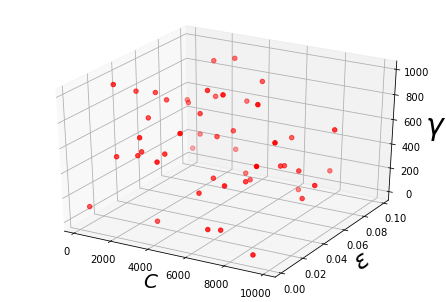





Best value iteration # 0 = 0.001428

Best value iteration # 1 = 0.000074

Best value iteration # 2 = 0.000067

Best value iteration # 3 = 0.000067

Best value iteration # 4 = 0.000065

Best value iteration # 5 = 0.000065

Best value iteration # 6 = 0.000060

Best value iteration # 7 = 0.000060

Best value iteration # 8 = 0.000060

Best value iteration # 9 = 0.000060

Best value iteration # 10 = 0.000060

Best value iteration # 11 = 0.000060

Best value iteration # 12 = 0.000060

Best value iteration # 13 = 0.000060

Best value iteration # 14 = 0.000058

Best value iteration # 15 = 0.000058

Best value iteration # 16 = 0.000058

Best value iteration # 17 = 0.000058

Best value iteration # 18 = 0.000058

Best value iteration # 19 = 0.000058

Group Best configuration found: 
[9.59343006e+03 1.82013896e-03 1.00000000e-03]


Best Regressor:

SVR(C=9593.430059985054, epsilon=0.0018201389626432874, gamma=0.001)




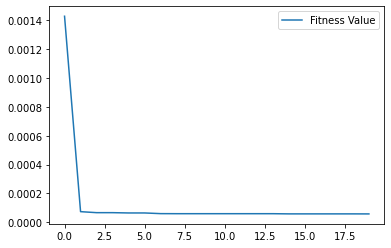

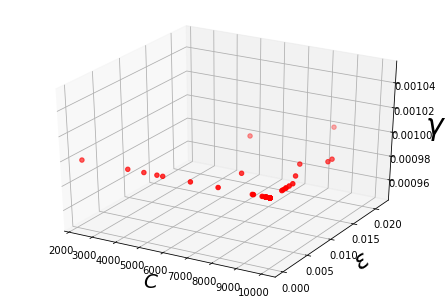





Predictions with the Population Best Value found:



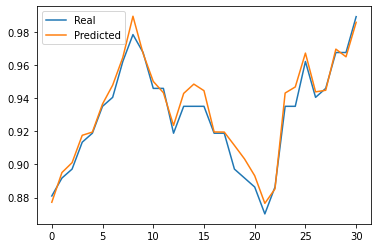





Mean Squared Error for the Test Set:	 0.000042




Predictions Average:	 0.933645




Predictions Median:	 0.943079






In [45]:
pso(50, 20, 3, 1)

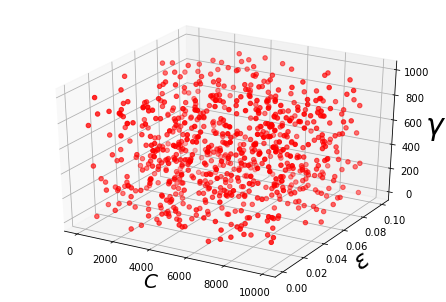





Best value iteration # 0 = 0.038056

Best value iteration # 1 = 0.000059

Best value iteration # 2 = 0.000059

Best value iteration # 3 = 0.000059

Best value iteration # 4 = 0.000059

Best value iteration # 5 = 0.000055

Best value iteration # 6 = 0.000055

Best value iteration # 7 = 0.000055

Best value iteration # 8 = 0.000055

Best value iteration # 9 = 0.000055

Best value iteration # 10 = 0.000055

Best value iteration # 11 = 0.000055

Best value iteration # 12 = 0.000055

Best value iteration # 13 = 0.000055

Best value iteration # 14 = 0.000050

Best value iteration # 15 = 0.000050

Best value iteration # 16 = 0.000050

Best value iteration # 17 = 0.000050

Best value iteration # 18 = 0.000050

Best value iteration # 19 = 0.000050

Group Best configuration found: 
[9.948516e+03 1.000000e-08 1.000000e-03]


Best Regressor:

SVR(C=9948.515998373612, epsilon=1e-08, gamma=0.001)




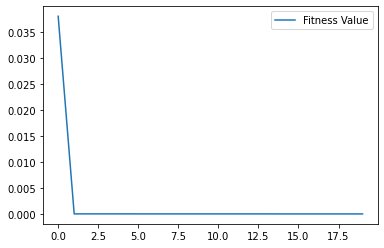

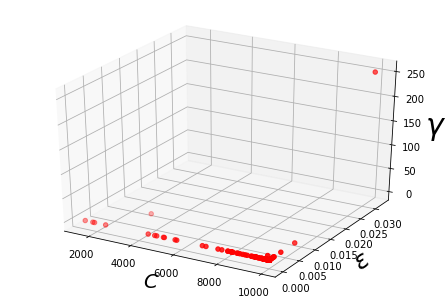





Predictions with the Population Best Value found:



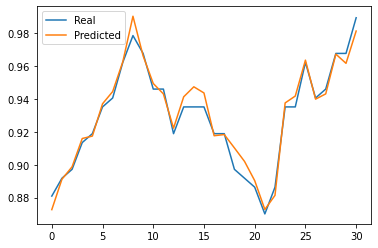





Mean Squared Error for the Test Set:	 0.000033




Predictions Average:	 0.931288




Predictions Median:	 0.939786






In [46]:
pso(770, 20, 3, 1)

<Figure size 640x480 with 0 Axes>





Best value iteration # 0 = 0.007911

Best value iteration # 1 = 0.000060

Best value iteration # 2 = 0.000060

Best value iteration # 3 = 0.000060

Best value iteration # 4 = 0.000060

Group Best configuration found: 
[1.00000000e+04 2.02772669e-04 1.00000000e-03]


Best Regressor:

SVR(C=10000.0, epsilon=0.0002027726689366946, gamma=0.001)




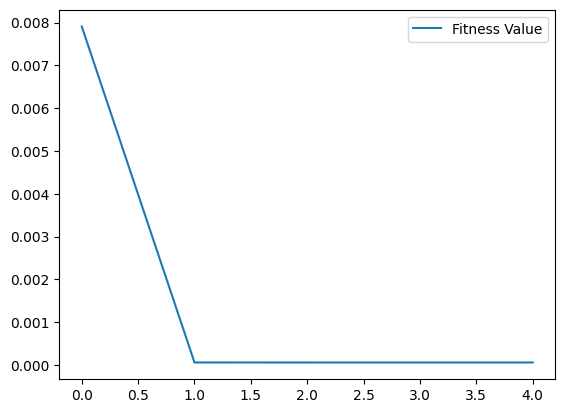

<Figure size 640x480 with 0 Axes>





Predictions with the Population Best Value found:



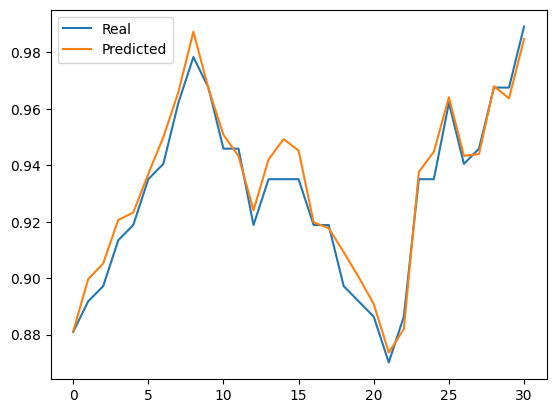





Mean Squared Error for the Test Set:	 0.000039




Predictions Average:	 0.933406




Predictions Median:	 0.942035






In [33]:
pso(770, 5, 3, 1)

<Figure size 640x480 with 0 Axes>





Best value iteration # 0 = 0.001100

Best value iteration # 1 = 0.000069

Best value iteration # 2 = 0.000059

Best value iteration # 3 = 0.000055

Best value iteration # 4 = 0.000055

Best value iteration # 5 = 0.000055

Best value iteration # 6 = 0.000055

Best value iteration # 7 = 0.000055

Best value iteration # 8 = 0.000055

Best value iteration # 9 = 0.000055

Group Best configuration found: 
[1.00000000e+04 1.58183781e-03 1.00000000e-03]


Best Regressor:

SVR(C=10000.0, epsilon=0.001581837808824182, gamma=0.001)




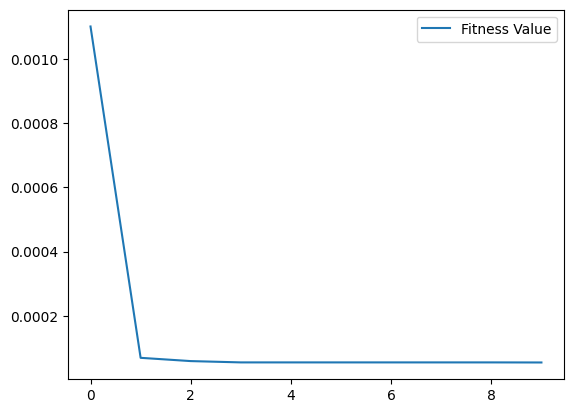

<Figure size 640x480 with 0 Axes>





Predictions with the Population Best Value found:



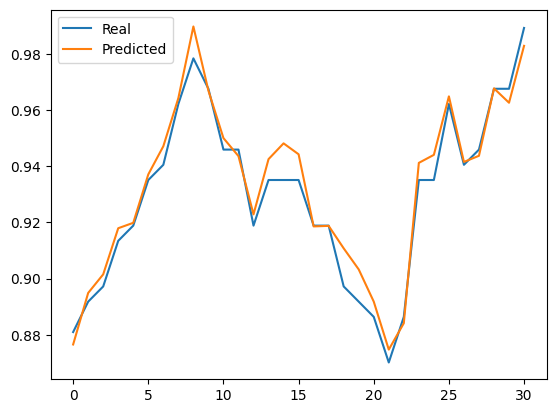





Mean Squared Error for the Test Set:	 0.000038




Predictions Average:	 0.932802




Predictions Median:	 0.941495






In [31]:
pso(770, 10, 3, 1)

<Figure size 640x480 with 0 Axes>





Best value iteration # 0 = 0.011532

Best value iteration # 1 = 0.000067

Best value iteration # 2 = 0.000061

Best value iteration # 3 = 0.000061

Best value iteration # 4 = 0.000061

Best value iteration # 5 = 0.000061

Best value iteration # 6 = 0.000058

Best value iteration # 7 = 0.000058

Best value iteration # 8 = 0.000058

Best value iteration # 9 = 0.000058

Best value iteration # 10 = 0.000058

Best value iteration # 11 = 0.000058

Best value iteration # 12 = 0.000058

Best value iteration # 13 = 0.000058

Best value iteration # 14 = 0.000058

Group Best configuration found: 
[9.47836109e+03 1.00000000e-08 1.00000000e-03]


Best Regressor:

SVR(C=9478.361086331559, epsilon=1e-08, gamma=0.001)




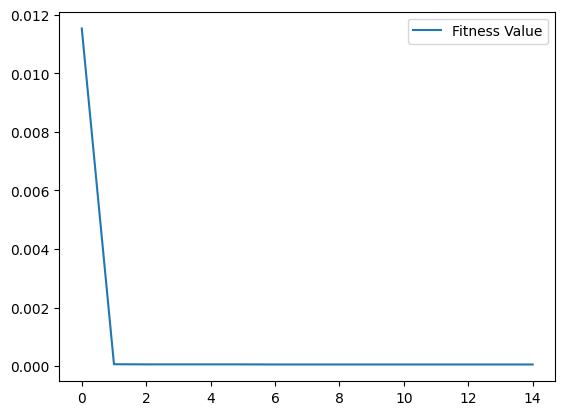

<Figure size 640x480 with 0 Axes>





Predictions with the Population Best Value found:



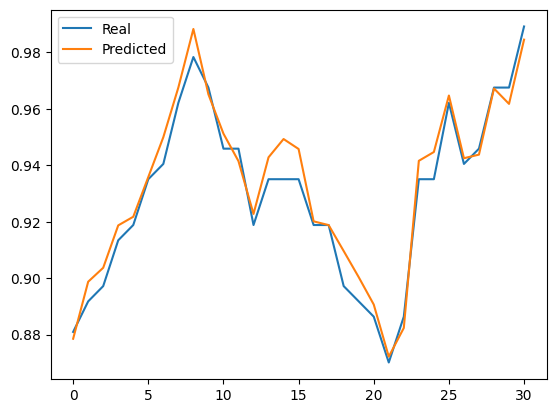





Mean Squared Error for the Test Set:	 0.000041




Predictions Average:	 0.933109




Predictions Median:	 0.941584






In [32]:
pso(770, 15, 3, 1)

<Figure size 640x480 with 0 Axes>





Best value iteration # 0 = 0.066015

Best value iteration # 1 = 0.000059

Best value iteration # 2 = 0.000058

Best value iteration # 3 = 0.000058

Best value iteration # 4 = 0.000058

Best value iteration # 5 = 0.000058

Best value iteration # 6 = 0.000058

Best value iteration # 7 = 0.000058

Best value iteration # 8 = 0.000058

Best value iteration # 9 = 0.000058

Best value iteration # 10 = 0.000056

Best value iteration # 11 = 0.000056

Best value iteration # 12 = 0.000056

Best value iteration # 13 = 0.000056

Best value iteration # 14 = 0.000056

Best value iteration # 15 = 0.000052

Best value iteration # 16 = 0.000052

Best value iteration # 17 = 0.000052

Best value iteration # 18 = 0.000052

Best value iteration # 19 = 0.000052

Best value iteration # 20 = 0.000052

Best value iteration # 21 = 0.000052

Best value iteration # 22 = 0.000052

Best value iteration # 23 = 0.000052

Best value iteration # 24 = 0.000052

Group Best configuration found: 
[1.00000000e+04 2.08871

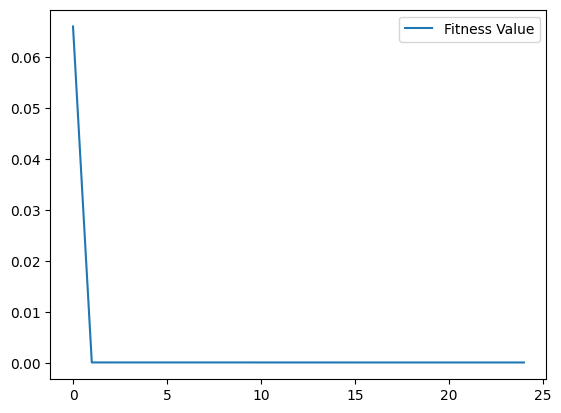

<Figure size 640x480 with 0 Axes>





Predictions with the Population Best Value found:



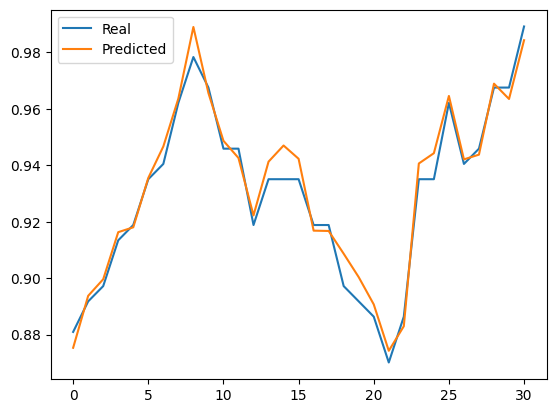





Mean Squared Error for the Test Set:	 0.000029




Predictions Average:	 0.931939




Predictions Median:	 0.941277






In [33]:
pso(770,25, 3, 1)

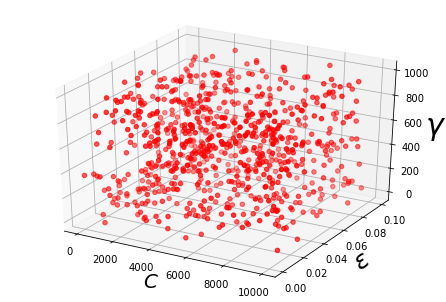





Best value iteration # 0 = 0.023766

Best value iteration # 1 = 0.000062

Best value iteration # 2 = 0.000061

Best value iteration # 3 = 0.000061

Best value iteration # 4 = 0.000060

Best value iteration # 5 = 0.000060

Best value iteration # 6 = 0.000057

Best value iteration # 7 = 0.000057

Best value iteration # 8 = 0.000057

Best value iteration # 9 = 0.000056

Best value iteration # 10 = 0.000056

Best value iteration # 11 = 0.000056

Best value iteration # 12 = 0.000056

Best value iteration # 13 = 0.000056

Best value iteration # 14 = 0.000056

Best value iteration # 15 = 0.000056

Best value iteration # 16 = 0.000056

Best value iteration # 17 = 0.000056

Best value iteration # 18 = 0.000056

Best value iteration # 19 = 0.000056

Best value iteration # 20 = 0.000056

Best value iteration # 21 = 0.000054

Best value iteration # 22 = 0.000054

Best value iteration # 23 = 0.000054

Best value iteration # 24 = 0.000054

Best value iteration # 25 = 0.000054

Best value iterati

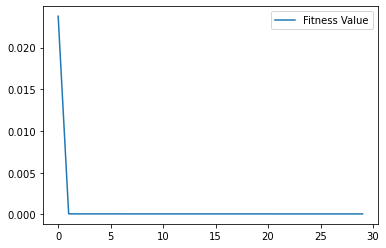

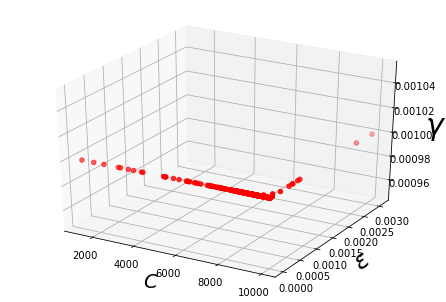





Predictions with the Population Best Value found:



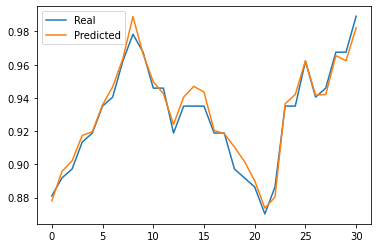





Mean Squared Error for the Test Set:	 0.000032




Predictions Average:	 0.931982




Predictions Median:	 0.940510






In [31]:
pso(770, 30, 3, 1)

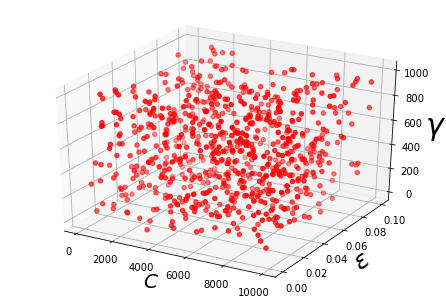





Best value iteration # 0 = 0.043864

Best value iteration # 1 = 0.000064

Best value iteration # 2 = 0.000058

Best value iteration # 3 = 0.000058

Best value iteration # 4 = 0.000058

Best value iteration # 5 = 0.000058

Best value iteration # 6 = 0.000058

Best value iteration # 7 = 0.000058

Best value iteration # 8 = 0.000058

Best value iteration # 9 = 0.000058

Best value iteration # 10 = 0.000058

Best value iteration # 11 = 0.000058

Best value iteration # 12 = 0.000058

Best value iteration # 13 = 0.000058

Best value iteration # 14 = 0.000058

Best value iteration # 15 = 0.000058

Best value iteration # 16 = 0.000058

Best value iteration # 17 = 0.000057

Best value iteration # 18 = 0.000057

Best value iteration # 19 = 0.000057

Best value iteration # 20 = 0.000057

Best value iteration # 21 = 0.000057

Best value iteration # 22 = 0.000057

Best value iteration # 23 = 0.000057

Best value iteration # 24 = 0.000057

Best value iteration # 25 = 0.000055

Best value iterati

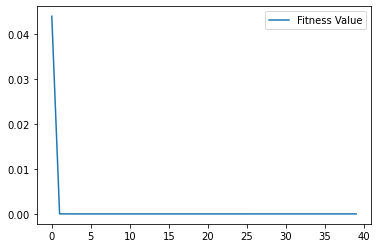

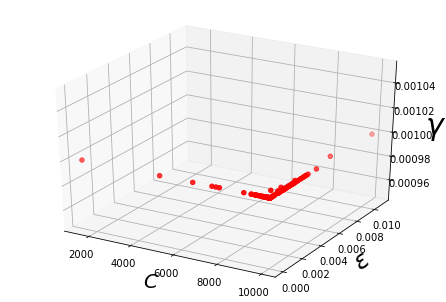





Predictions with the Population Best Value found:



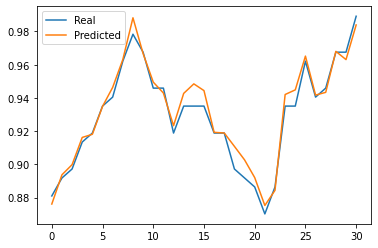





Mean Squared Error for the Test Set:	 0.000036




Predictions Average:	 0.932568




Predictions Median:	 0.942044






In [31]:
pso(770, 40, 3, 1)

In [51]:
data_f = datacomplete_clean.copy()
x = data_f.drop(labels='Close', axis=1).values
y = data_f['Close'].values

array_to_list = y.tolist()

array_to_list.pop(0)
final_numpy_array = np.asarray(array_to_list)
final_numpy_array.shape


(769,)

In [64]:
#prediction
from sklearn.metrics import mean_squared_error

rgs = svm.SVR(C = 10000 , epsilon = 0.002088718386009056, gamma = 0.001)
rgs.fit(x, y)

y_predict = rgs.predict(x)
y_predict_to_list = y_predict.tolist()
y_predict_to_list.pop(769)
y_predict_numpy_array = np.asarray(y_predict_to_list)



#mse = mean_squared_error(final_numpy_array,y_predict_numpy_array)


forecast = pd.DataFrame(y_predict_numpy_array, columns=['y(t)'])
forecast['y']= final_numpy_array
forecast = forecast[['y', 'y(t)']]

forecast.to_csv('forecast2.csv', index=True)
y_predict[769]

9249.998202841613

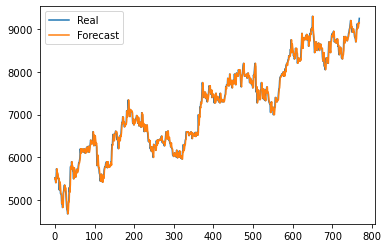

In [58]:
plt.plot(range(len(final_numpy_array)), final_numpy_array, label='Real')
plt.plot(range(len(y_predict_numpy_array)), y_predict_numpy_array, label='Forecast')
plt.legend()
plt.show()